In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Final Deliverable for Team 3

### This file is a collection of the first three Deliverables of Team 3. Holding code, preliminary analysis, and answers to all three Key questions.

# Preprocessing Step

Here we remove USPTO numbers for patent applications (has the format of nn/nnnnnn or 11-12 digits) or in the wrong format

In [3]:
#df = pd.read_csv('D:\CS\cs506\project/patents_date.csv')
df = pd.read_csv('new_data/patents_date.csv')

print('Before processing: ', df.shape)
df_patents = df[~df['USPTO'].str.contains('/')].reset_index()
df_patents['Len_USPTO'] = df_patents['USPTO'].astype(str).apply(len)
df_patents = df_patents[(df_patents['Len_USPTO'] > 6) & (df_patents['Len_USPTO'] < 9)]
print('After processing: ', df_patents.shape)



Before processing:  (6179, 3)
After processing:  (4569, 5)


Currently we are only able to acquire filing dates for ~3800 USPTO numbers from USPTO's database and hence eliminate those not yet found from our analysis.

In [4]:
df_patents_nonan = df_patents.dropna().reset_index()
df_patents_nonan['Year'] = pd.to_datetime(df_patents_nonan['Filing_Date']).dt.year
print('After eliminating nan values: ', df_patents_nonan.shape)
print('Number of unique patents in final selection: ', len(pd.unique(df_patents_nonan['USPTO'])))
print("A sample of df_patents_nonan")
print(df_patents_nonan.head())

After eliminating nan values:  (3873, 7)
Number of unique patents in final selection:  3018
A sample of df_patents_nonan
   level_0  index     USPTO  Author_Id Filing_Date  Len_USPTO  Year
0        0      0   9741253       1485  2015-10-09          7  2015
1        1      2  10917173       4030  2019-09-24          8  2019
2        2      3  10899479       4030  2018-06-11          8  2018
3        3      4  10826609       4030  2019-06-20          8  2019
4        4      5  10530478       4030  2017-11-06          8  2017


In [5]:
df_articles = pd.read_csv('new_data/articles.csv')
print("shape:", df_articles.shape)
print("A sample of df_articles")
print(df_articles.head())


shape: (131307, 4)
A sample of df_articles
                                               Title  Author_Id  Year  \
0  Robust Control of Arrivals Into a Queuing Network       1485  2021   
1   Control and Optimization of Air Traffic Networks       1485  2021   
2  Efficiency and Fairness in Unmanned Air Traffi...       1485  2021   
3  Comparative Analysis of Departure Metering at ...       1485  2020   
4  Sign-stability of Positive Markov Jump Linear ...       1485  2020   

   Citation_Count  
0               0  
1               0  
2               0  
3               0  
4               1  


In [6]:
df_proceedings = pd.read_csv('new_data/proc.csv')
print("shape:", df_proceedings.shape)
print("A sample of df_proceedings")
print(df_proceedings.head())

shape: (25718, 4)
A sample of df_proceedings
                                               Title  Author_Id  Year  \
0   Approximate Projection-Based Control of Networks       1485  2020   
1  Outlier Analysis of Airport Delay Distribution...       1485  2020   
2       Identification of Outliers in Graph Signals*       1485  2019   
3  Simulation-based Benefits and Costs Assessment...       1485  2018   
4  Evaluating the Impact of Uncertainty on Airpor...       1485  2018   

   Citation_Count  
0               0  
1               1  
2               1  
3               1  
4               5  


In [7]:
df_prof = pd.read_csv('new_data/MIT_Faculty.csv')
df_2004 = pd.read_csv('prof_year/2004.csv')
test = df_2004.loc[df_2004['Id'].astype(str).str.contains("1485")]
print(test)
test2 = df_2004.loc[df_2004['Id'].astype(str).str.contains("2030")]
print(test2.shape[0])

df_2005 = pd.read_csv('prof_year/2005.csv')
df_2006 = pd.read_csv('prof_year/2006.csv')
df_2007 = pd.read_csv('prof_year/2007.csv')
df_2008 = pd.read_csv('prof_year/2008.csv')
df_2009 = pd.read_csv('prof_year/2009.csv')
df_2010 = pd.read_csv('prof_year/2010.csv')
df_2011 = pd.read_csv('prof_year/2011.csv')
df_2012 = pd.read_csv('prof_year/2012.csv')
df_2013 = pd.read_csv('prof_year/2013.csv')
df_2014 = pd.read_csv('prof_year/2014.csv')
df_2015 = pd.read_csv('prof_year/2015.csv')
df_2016 = pd.read_csv('prof_year/2016.csv')
df_2017 = pd.read_csv('prof_year/2017.csv')
df_2018 = pd.read_csv('prof_year/2018.csv')
df_2019 = pd.read_csv('prof_year/2019.csv')
df_2020 = pd.read_csv('prof_year/2020.csv')
df_2021 = pd.read_csv('prof_year/2021.csv')


        Id                 Name  PersonId  LastName  FirstName  \
0     1485  BALAKRISHNAN, HAMSA      6622       NaN        NaN   
862  14850     CISSE, IBRAHIM I    779065       NaN        NaN   

                       Department   RankName  TotalArticleCount  \
0    Aeronautics and Astronautics  Professor                 46   
862                       Physics  Associate                 25   

     TotalConfProcCount  TotalGrantCount  TotalGrantDollars  TotalAwardCount  \
0                    63               15                0.0                4   
862                   1                3                0.0                4   

     TotalCitationCount  TotalBookCount  
0                  1477               1  
862                2323               0  
0


In [8]:
import numpy as np

missing = 0

start_year = []
end_year = []
work_year = []

for id in df_prof['Id'].astype(str).tolist():
    min = 9999
    max = 0
    #df_2004.loc[df_2004['Id'].astype(str).str.contains(id)].shape[0] > 0
    if (df_2004[df_2004['Id'].astype(str) == id].shape[0] > 0):
        temp = 2004
        if(temp < min):
            min = temp
        if(temp > max):
            max = temp
    
    if (df_2005[df_2005['Id'].astype(str) == id].shape[0] > 0):
        temp = 2005
        if(temp < min):
            min = temp
        if(temp > max):
            max = temp

    if (df_2006[df_2006['Id'].astype(str) == id].shape[0] > 0):
        temp = 2006
        if(temp < min):
            min = temp
        if(temp > max):
            max = temp

    if (df_2007[df_2007['Id'].astype(str) == id].shape[0] > 0):
        temp = 2007
        if(temp < min):
            min = temp
        if(temp > max):
            max = temp

    if (df_2008[df_2008['Id'].astype(str) == id].shape[0] > 0):
        temp = 2008
        if(temp < min):
            min = temp
        if(temp > max):
            max = temp

    if (df_2009[df_2009['Id'].astype(str) == id].shape[0] > 0):
        temp = 2009
        if(temp < min):
            min = temp
        if(temp > max):
            max = temp

    if (df_2010[df_2010['Id'].astype(str) == id].shape[0] > 0):
        temp = 2010
        if(temp < min):
            min = temp
        if(temp > max):
            max = temp

    if (df_2011[df_2011['Id'].astype(str) == id].shape[0] > 0):
        temp = 2011
        if(temp < min):
            min = temp
        if(temp > max):
            max = temp

    if (df_2012[df_2012['Id'].astype(str) == id].shape[0] > 0):
        temp = 2012
        if(temp < min):
            min = temp
        if(temp > max):
            max = temp

    if (df_2013[df_2013['Id'].astype(str) == id].shape[0] > 0):
        temp = 2013
        if(temp < min):
            min = temp
        if(temp > max):
            max = temp

    if (df_2014[df_2014['Id'].astype(str) == id].shape[0] > 0):
        temp = 2014
        if(temp < min):
            min = temp
        if(temp > max):
            max = temp

    if (df_2015[df_2015['Id'].astype(str) == id].shape[0] > 0):
        temp = 2015
        if(temp < min):
            min = temp
        if(temp > max):
            max = temp

    if (df_2016[df_2016['Id'].astype(str) == id].shape[0] > 0):
        temp = 2016
        if(temp < min):
            min = temp
        if(temp > max):
            max = temp

    if (df_2017[df_2017['Id'].astype(str) == id].shape[0] > 0):
        temp = 2017
        if(temp < min):
            min = temp
        if(temp > max):
            max = temp

    if (df_2018[df_2018['Id'].astype(str) == id].shape[0] > 0):
        temp = 2018
        if(temp < min):
            min = temp
        if(temp > max):
            max = temp

    if (df_2019[df_2019['Id'].astype(str) == id].shape[0] > 0):
        temp = 2019
        if(temp < min):
            min = temp
        if(temp > max):
            max = temp

    if (df_2020[df_2020['Id'].astype(str) == id].shape[0] > 0):
        temp = 2020
        if(temp < min):
            min = temp
        if(temp > max):
            max = temp

    if (df_2021[df_2021['Id'].astype(str) == id].shape[0] > 0):
        temp = 2021
        if(temp < min):
            min = temp
        if(temp > max):
            max = temp

    
    start_year.append(min)
    end_year.append(max)
    work_year.append(max - min)
    if(max == 0 or min == 9999):
        missing += 1 

In [11]:
print(missing,  " Faculty members not assigned with start_year or end_year")
df_prof['Start_year'] = start_year
df_prof['End_year'] = end_year
df_prof['Work_year'] = work_year
print(df_prof.head())

615  Faculty members not assigned with start_year or end_year
     Id                  Name  PersonId                    Department  \
0  1485   BALAKRISHNAN, HAMSA      6622  Aeronautics and Astronautics   
1  2030  BARRETT, STEVEN R. H    412239  Aeronautics and Astronautics   
2  2190     BELOBABA, PETER P    287096  Aeronautics and Astronautics   
3  2695     BINZEL, RICHARD P     10148  Aeronautics and Astronautics   
4  4030          CAHOY, KERRI    488061  Aeronautics and Astronautics   

    RankName  TotalArticleCount  TotalConfProcCount  TotalGrantCount  \
0  Professor                 46                  63               15   
1  Associate                 87                   7               11   
2      Other                 24                   2                0   
3  Professor                163                  13               23   
4  Associate                 47                  72               45   

   TotalGrantDollars  TotalAwardCount  TotalCitationCount  TotalBo

In [12]:
df_prof2 = df_prof[df_prof['Start_year'] != 9999]
df_old_prof = df_prof2[df_prof2['Start_year'] <= 2011]
df_new_prof = df_prof2[df_prof2['Start_year'] > 2011]

print(df_prof.shape)
print(df_prof2.shape)
print(df_old_prof.shape)
print(df_new_prof.shape)
print(df_prof['TotalConfProcCount'].sum())

(2015, 20)
(1400, 20)
(1282, 20)
(118, 20)
25718


In [38]:
dataset1 = df_prof[df_prof['Department'].notnull()]
num = len(dataset1)
print(num)
dataset2 = dataset1[dataset1['Gender'] != "unknown"]
num = len(dataset2)
print(num)
dataset3 = df_prof[df_prof['RankName'].notnull()]
num = len(dataset3)
print(num)



1357
1357
1357


In [41]:
# ['Professor' 'Associate' 'Other' 'Assistant' 'Lecturer']
df_professor = dataset3[dataset3['RankName'] == "Professor"]
print(len(df_professor))

df_associate = dataset3[dataset3['RankName'] == "Associate"]
print(len(df_associate))

df_other = dataset3[dataset3['RankName'] == "Other"]
print(len(df_other))

df_assistant = dataset3[dataset3['RankName'] == "Assistant"]
print(len(df_assistant))

df_lecturer = dataset3[dataset3['RankName'] == "Lecturer"]
print(len(df_lecturer))

688
235
246
187
1


In [15]:
genders = []
departments = []
for author_id in df_patents_nonan['Author_Id'].astype(str).tolist():
    gender = df_prof['Gender'][df_prof['Id'].astype(str) == author_id].tolist()[0]
    department = df_prof['Department'][df_prof['Id'].astype(str).fillna('') == author_id].tolist()[0]
    genders.append(gender)
    departments.append(department)

df_patents_nonan['Gender'] = genders
df_patents_nonan['Department'] = departments

df_patents_nonan['Gender'] = df_patents_nonan['Gender'].astype(str)
df_patents_nonan['Department'] = df_patents_nonan['Department'].astype(str)

In [17]:
def match_gender2(df):
    genders = []

    for author_id in df['Author_Id'].astype(str).tolist():
        gender = df_prof['Gender'][df_prof['Id'].astype(str) == author_id].tolist()[0]
        
        genders.append(gender)
        

    df['Gender'] = genders
    return df


#df_articles = pd.read_csv('new_data/articles.csv')
#df_proceedings = pd.read_csv('new_data/proc.csv')

df_articles = match_gender2(df_articles)
df_proceedings = match_gender2(df_proceedings)

In [19]:
df_prof_dep_dup = pd.read_csv("new_data/MIT_Faculty_dup_gender.csv")
print(len(df_prof_dep_dup))
print(df_prof_dep_dup.head())

10923
   Unnamed: 0    Id                 Name  PersonId  \
0           0  1485  BALAKRISHNAN, HAMSA      6622   
1           1  1485  BALAKRISHNAN, HAMSA      6622   
2           2  1485  BALAKRISHNAN, HAMSA      6622   
3           3  1485  BALAKRISHNAN, HAMSA      6622   
4           4  1485  BALAKRISHNAN, HAMSA      6622   

                     Department   RankName  TotalArticleCount  \
0  Aeronautics and Astronautics  Professor                 46   
1  Aeronautics and Astronautics  Professor                 46   
2  Aeronautics and Astronautics  Professor                 46   
3  Aeronautics and Astronautics  Professor                 46   
4  Aeronautics and Astronautics  Professor                 46   

   TotalConfProcCount  TotalGrantCount  TotalGrantDollars  ...  \
0                  63               15                  0  ...   
1                  63               15                  0  ...   
2                  63               15                  0  ...   
3             

In [20]:
#list of datasets so far:
# df_prof with 2015 faculty member, with fields... two data points with unknown starting year/ end_year
# df_prof2 = with 1400 faculty members, with fields id name department.... patent, article, gender, excluding unknown starting year / end year
# df_old_prof & df_new_prof used for deliverable 3, partitioned by start_year ><= 2011
# df_prof_short & df_prof_long used for deliverable 3, partitioned by work_year ><= 10
# dataset2 = with 1357 faculty member, equivalent to df_prof with faculty members with department == nan removed used for code from Deliverable 1
# dataset3 = with 1357 faculty member, equivalent to df_prof with faculty members with rank name == nan removed used for code from Deliverable 3
# df_professor, df_associate, df_other, df_assistant & df_lecturer are subsets of dataset3, partitioned based on faculty rank name
# df_patents_nonan dataset of patents with verified uspto numbers + matching gender and department of inventor for deliverable 2
# df_articles & df_proceedings = dataset of articles/ conference proceedings with matching gender for deliverable 2
# df_prof_dep_dup, with 10923 samples, including duplicates of MIT faculty members. Used for per department analysis in key question 1. (if faculty member
#               is in departments A and B, he/she will be included 2 times in this dataset, however within each department there are no duplicates)

# Preliminary

#### Total Gender Info

In [23]:
#Gender_info = dataset2['Gender'].value_counts()
Gender_info = df_prof['Gender'].value_counts()
print(Gender_info)

male      1544
female     471
Name: Gender, dtype: int64


#### Total Article Count by gender

Gender
female     28411
male      102896
Name: TotalArticleCount, dtype: int64
Gender
female    60.320594
male      66.642487
Name: TotalArticleCount, dtype: float64

Bar graph: Article count per Gender



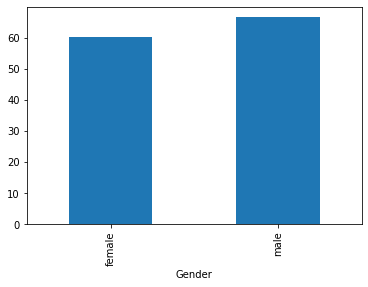

In [24]:
# Total article counts by gender
#Total_Article_by_gender_sum = dataset2.groupby('Gender')['TotalArticleCount'].sum()
Total_Article_by_gender_sum = df_prof.groupby('Gender')['TotalArticleCount'].sum()
print(Total_Article_by_gender_sum)

# Mean of total article counts by gender
#Total_Article_by_gender_mean = dataset2.groupby('Gender')['TotalArticleCount'].mean()
Total_Article_by_gender_mean = df_prof.groupby('Gender')['TotalArticleCount'].mean()
print(Total_Article_by_gender_mean)

# bar graph plotting the mean
print()
print("Bar graph: Article count per Gender")

Total_Article_by_gender_mean.plot.bar()
print()

#### Total conference proceedings counts by gender

Gender
female     5874
male      19844
Name: TotalConfProcCount, dtype: int64
Gender
female    12.471338
male      12.852332
Name: TotalConfProcCount, dtype: float64

Bar graph: Conference proceedings count per Gender



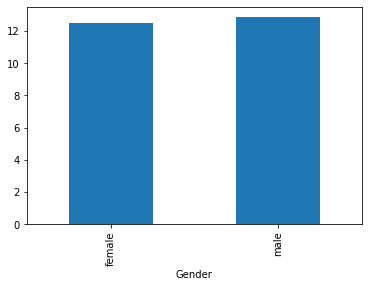

In [25]:
# Total conference proceedings counts by gender
#Total_ConPro_by_gender_sum = dataset2.groupby('Gender')['TotalConfProcCount'].sum()
Total_ConPro_by_gender_sum = df_prof.groupby('Gender')['TotalConfProcCount'].sum()
print(Total_ConPro_by_gender_sum)

# Mean of total conference proceedings counts by gender
#Total_ConPro_by_gender_mean = dataset2.groupby('Gender')['TotalConfProcCount'].mean()
Total_ConPro_by_gender_mean = df_prof.groupby('Gender')['TotalConfProcCount'].mean()
print(Total_ConPro_by_gender_mean)

# bar graph plotting the mean
print()
print("Bar graph: Conference proceedings count per Gender")

Total_ConPro_by_gender_mean.plot.bar()
print()

#### Total patent counts by gender using Data from MIT Collaboration

Gender
female    1148
male      4994
Name: TotalPatentCount, dtype: int64
Gender
female    2.437367
male      3.234456
Name: TotalPatentCount, dtype: float64

Bar graph: Patent count per Gender



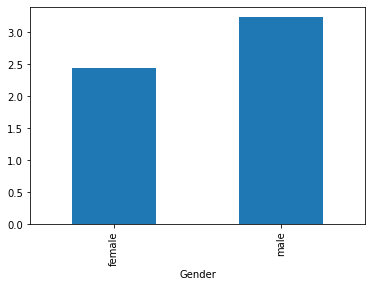

In [26]:
# Total patent counts by gender
#Total_Patent_by_gender_sum = dataset2.groupby('Gender')['TotalPatentCount'].sum()
Total_Patent_by_gender_sum = df_prof.groupby('Gender')['TotalPatentCount'].sum()
print(Total_Patent_by_gender_sum)

# Mean of total patent counts by gender
#Total_Patent_by_gender_mean = dataset2.groupby('Gender')['TotalPatentCount'].mean()
Total_Patent_by_gender_mean = df_prof.groupby('Gender')['TotalPatentCount'].mean()
print(Total_Patent_by_gender_mean)

# bar graph plotting the mean
print()
print("Bar graph: Patent count per Gender")
Total_Patent_by_gender_mean.plot.bar()
print()

#### Gender per Department

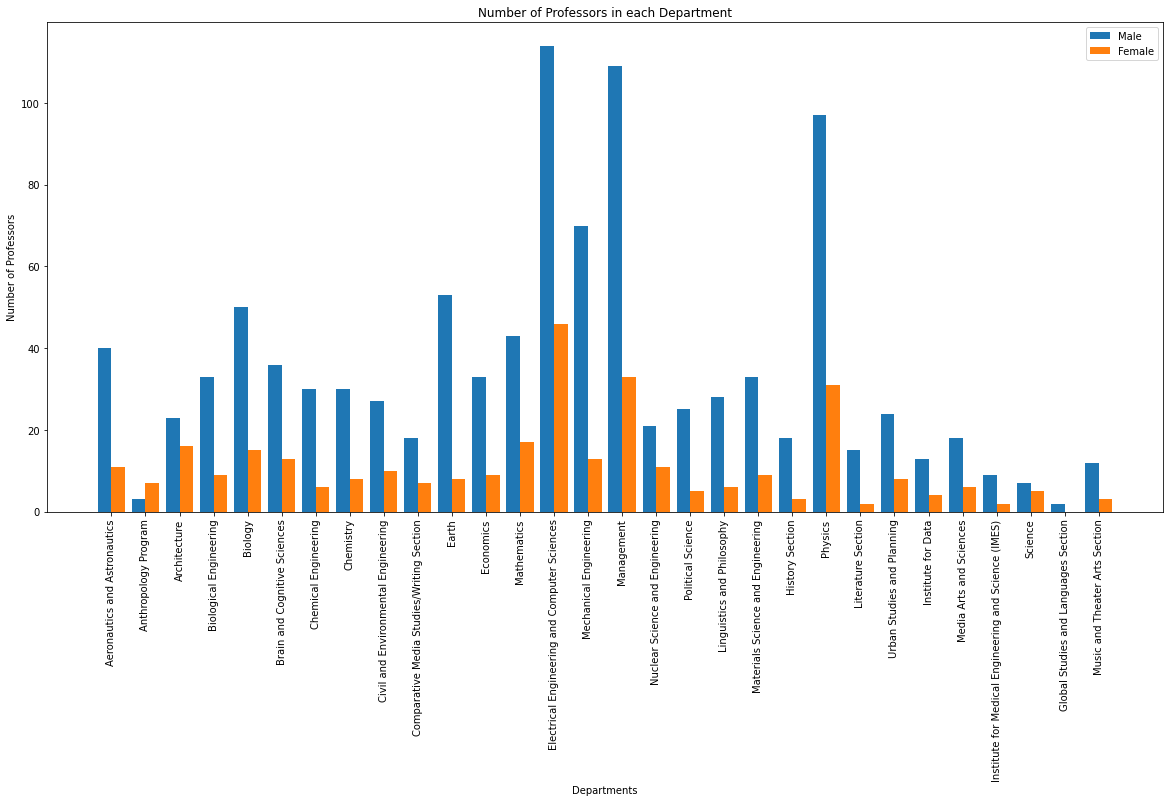

In [27]:
import numpy as np
import matplotlib.pyplot as plt

def plot_gender_by_department():
    # please Note we are using dataset2 instead of df_prof here, this is because df_prof includes professors with unknown departments
    X = dataset2['Department'].unique()
    #print(X)

    male = []
    female = []

    for dept in X:
        df = dataset2[dataset2['Department'] == dept]
    
        group_male = df[df['Gender'] == 'male']
        group_female = df[df['Gender'] == 'female']
        male.append(group_male.shape[0])
        female.append(group_female.shape[0])

  

    f = plt.figure()
    f.set_figwidth(20)
    f.set_figheight(9)

    X_axis = np.arange(len(X))
  
    plt.bar(X_axis - 0.2, male, 0.4, label = 'Male')
    plt.bar(X_axis + 0.2, female, 0.4, label = 'Female')


    plt.xticks(X_axis, X, rotation = 90)
    plt.xlabel("Departments")
    plt.ylabel("Number of Professors")
    plt.title("Number of Professors in each Department")
    plt.legend()

    plt.show()

plot_gender_by_department()



#### Total number of patents and the average number of patents per professor for each gender after verifying with USPTO

Text(0, 0.5, 'Number of Patents')

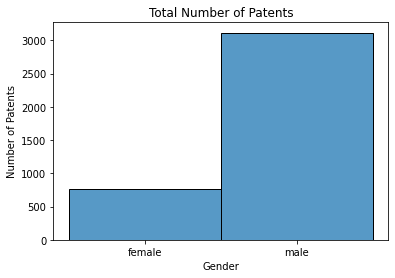

In [28]:
#start of prelim from deliverable 2
plt.figure()
sns.histplot(data=df_patents_nonan['Gender'])
plt.title('Total Number of Patents')
plt.ylabel('Number of Patents')

Text(0, 0.5, 'Number of Patents')

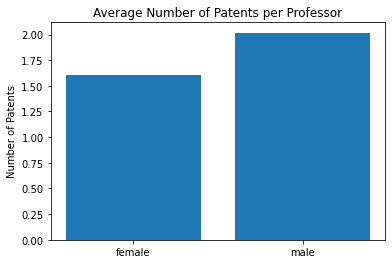

In [29]:
gender_pat = df_patents_nonan['Gender'].value_counts()
gender_prof = df_prof['Gender'].value_counts()

plt.bar([1,0], (gender_pat / gender_prof).to_numpy(), tick_label=['male', 'female'])
plt.title('Average Number of Patents per Professor')
plt.ylabel('Number of Patents')

We see a large disparity in total number of patents between the genders that gets smaller as we account for the number of professors for each gender, which matches our finding from deliverable 1.

#### Total number of patents and the average number of patents per Department for each gender after verifying with USPTO

In [30]:
# Drop professors without a department
df_patents_department = df_patents_nonan[df_patents_nonan['Department'] != 'nan']

n_patents_department = df_patents_department['Gender'].groupby(df_patents_department['Department']).value_counts().to_frame('N_Patents').reset_index()
n_prof_department = df_prof['Gender'].groupby(df_prof['Department']).value_counts().to_frame('N_Prof').reset_index()

for department in n_patents_department['Department'].unique():
    for gender in ['male', 'female']:
        n_prof = n_prof_department[(n_prof_department['Gender'] == gender) & (n_prof_department['Department'] == department)]['N_Prof']
        ind = n_patents_department[(n_patents_department['Gender'] == gender) & (n_patents_department['Department'] == department)].index

        if n_prof.empty:
            n_patents_department.loc[ind, 'N_Patents_Prof'] = 0

        else:
            n_patent = n_patents_department[(n_patents_department['Gender'] == gender) & (n_patents_department['Department'] == department)]['N_Patents']

            try:
                n_patents_department.loc[ind, 'N_Patents_Prof'] = (n_patent.values / n_prof.values)[0]
            except:
                n_patents_department.loc[ind, 'N_Patents_Prof'] = 0

Text(0, 0.5, 'Average Number of Patents per Professor')

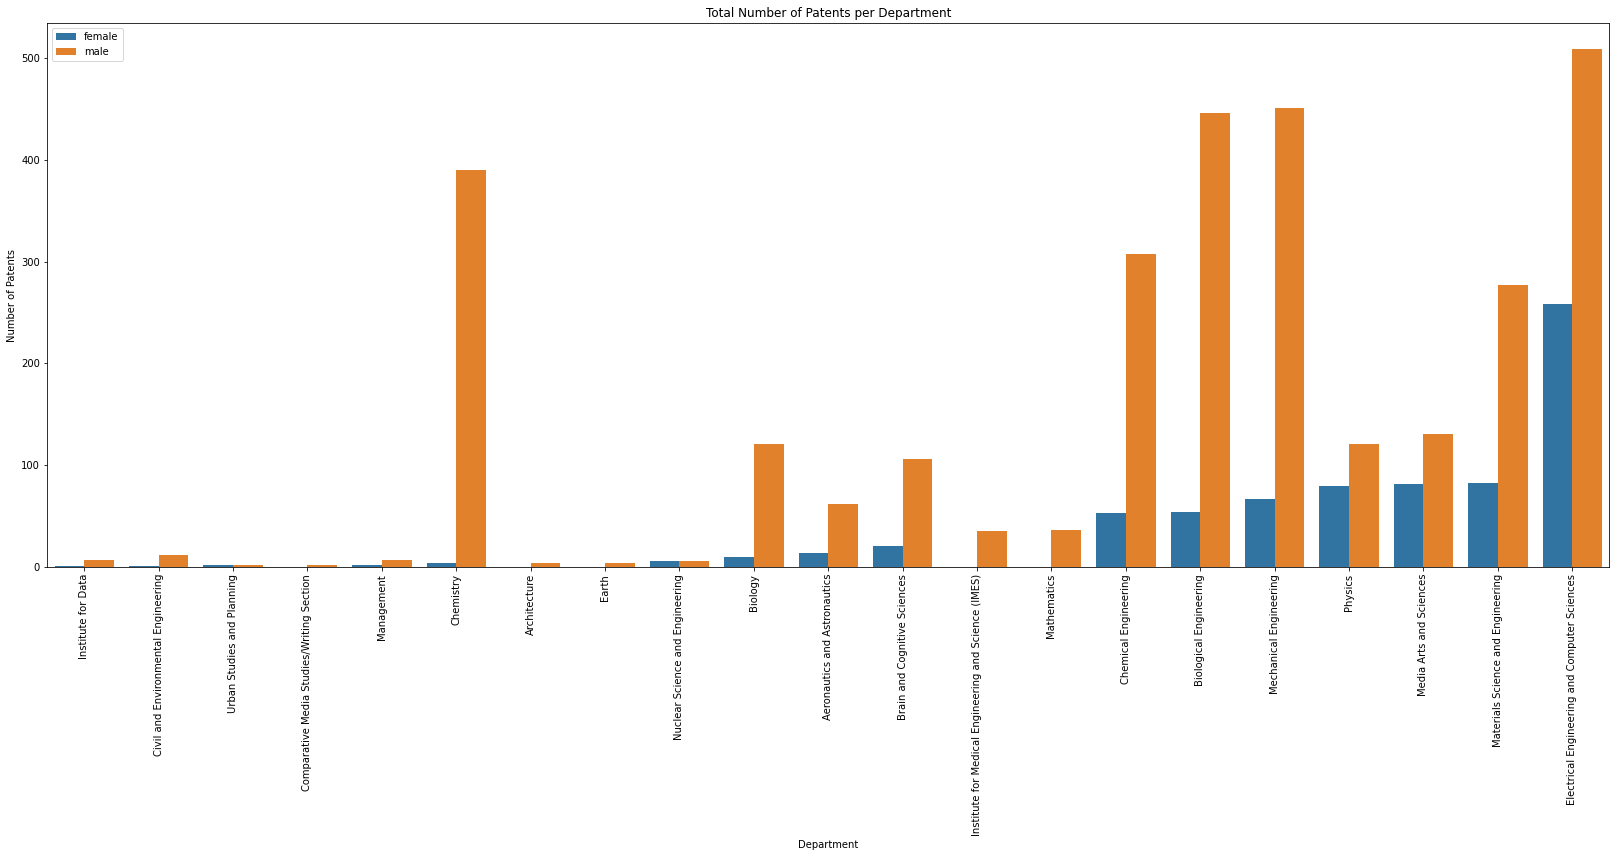

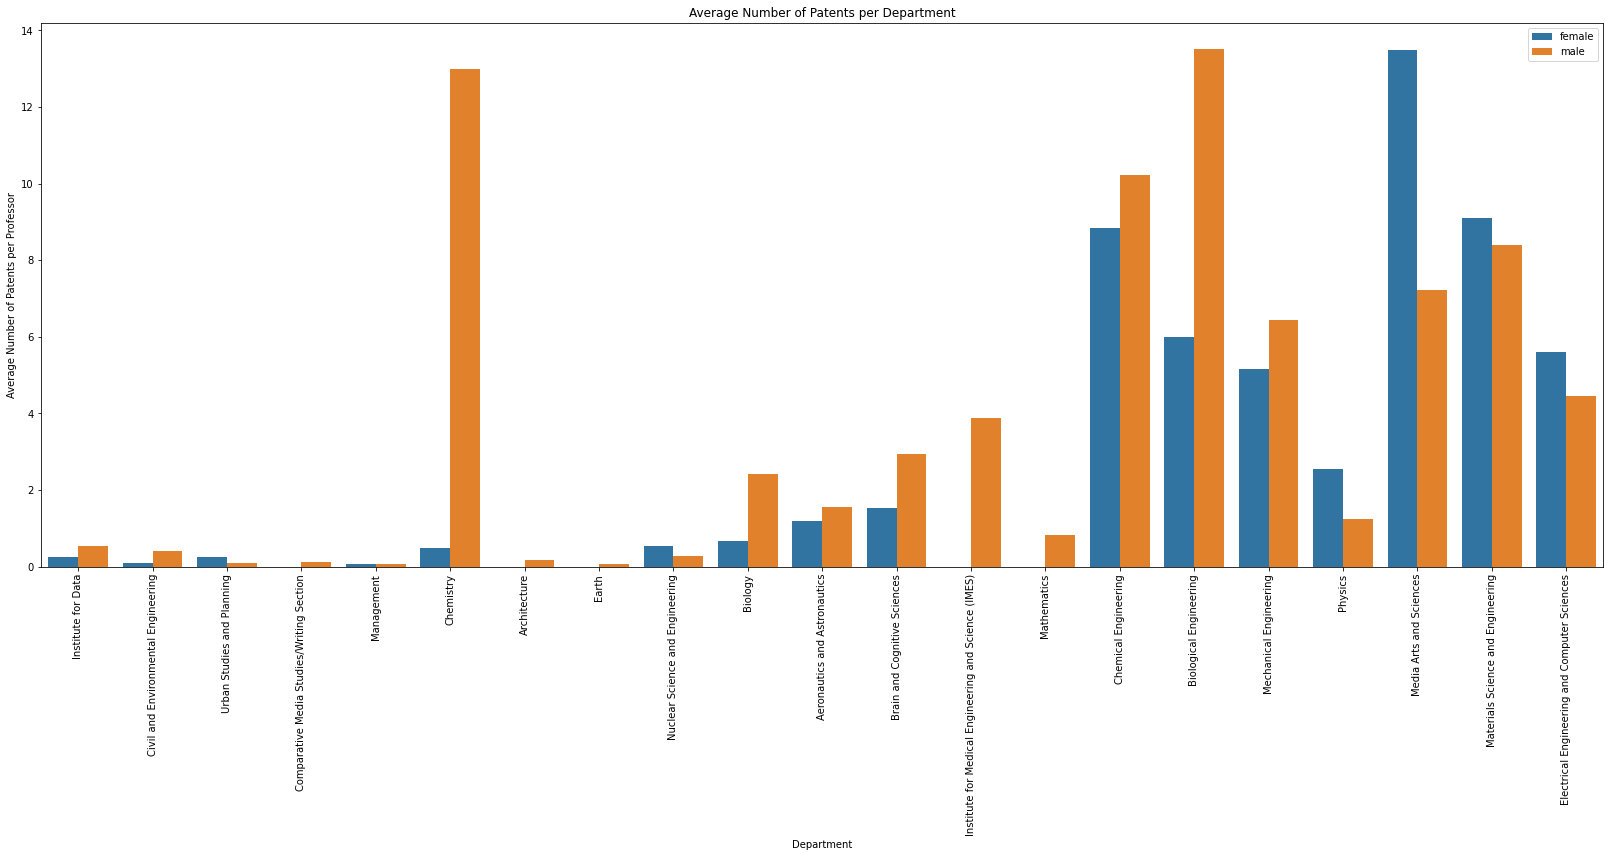

In [31]:
fig = plt.figure(figsize=(28, 10))
sns.barplot(x='Department', y='N_Patents', hue='Gender', data=n_patents_department.sort_values('N_Patents'))
plt.legend()
plt.xticks(rotation = 90)
plt.title('Total Number of Patents per Department')
plt.ylabel('Number of Patents')

fig = plt.figure(figsize=(28, 10))
sns.barplot(x='Department', y='N_Patents_Prof', hue='Gender', data=n_patents_department.sort_values('N_Patents'))
plt.legend()
plt.xticks(rotation = 90)
plt.title('Average Number of Patents per Department')
plt.ylabel('Average Number of Patents per Professor')

Several of the departments see female professors having an average number of patents matching or even higher than their male peers, notably Physics, Media Arts and Science, Nuclear Science and Engineering departments, which have female professors acquiring on average several times more patents than the male professors respectively. However, the large disparity occurs in most departments, with a number of departments having no patents for female professors.

#### Total number of patents and fraction of total number of patents for each gender in each year to see if the disparity is changing over time.

Text(0, 0.5, 'Number of Patents')

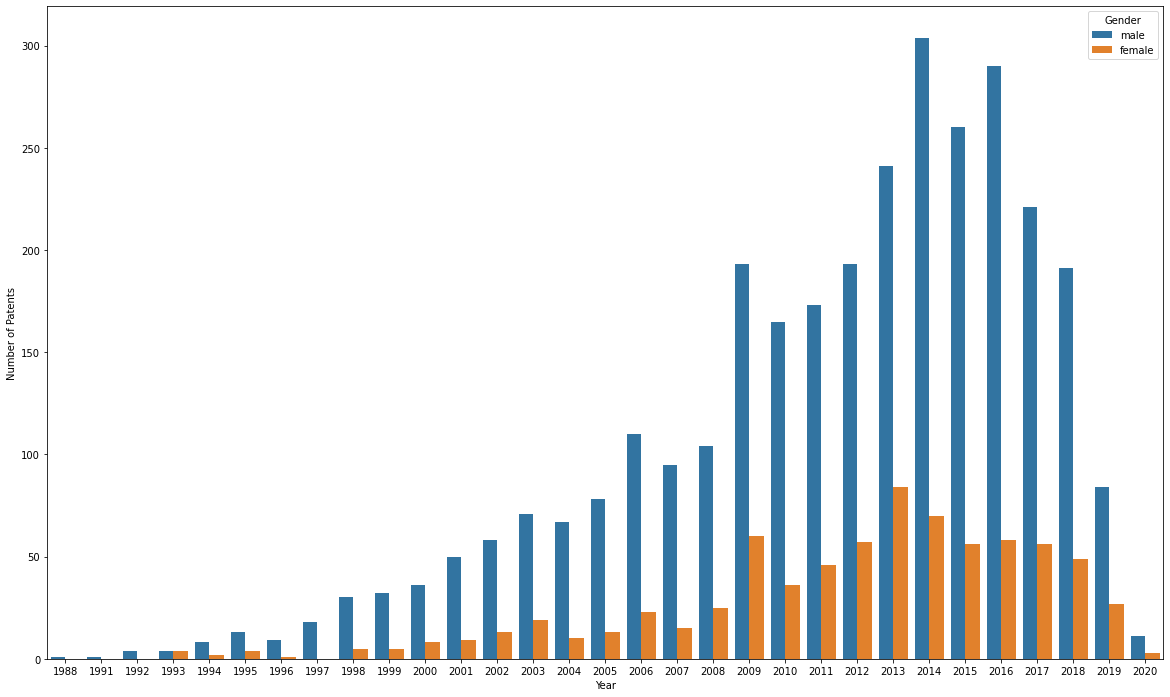

In [32]:
df_patents_nonan['Filing_Date'] = pd.to_datetime(df_patents_nonan['Filing_Date'])
patents_year = df_patents_nonan['Gender'].groupby(df_patents_nonan['Filing_Date'].dt.year).value_counts().to_frame('N_Patents').reset_index()
fig = plt.figure(figsize=(20, 12))
sns.barplot(x='Filing_Date', y='N_Patents', hue='Gender', data=patents_year)
plt.xlabel('Year')
plt.ylabel('Number of Patents')

    Filing_Date  Gender  N_Patents
0          1988    male   1.000000
1          1991    male   1.000000
2          1992    male   1.000000
3          1993  female   0.500000
4          1993    male   0.500000
5          1994    male   0.800000
6          1994  female   0.200000
7          1995    male   0.764706
8          1995  female   0.235294
9          1996    male   0.900000
10         1996  female   0.100000
11         1997    male   1.000000
12         1998    male   0.857143
13         1998  female   0.142857
14         1999    male   0.864865
15         1999  female   0.135135
16         2000    male   0.818182
17         2000  female   0.181818
18         2001    male   0.847458
19         2001  female   0.152542
20         2002    male   0.816901
21         2002  female   0.183099
22         2003    male   0.788889
23         2003  female   0.211111
24         2004    male   0.870130
25         2004  female   0.129870
26         2005    male   0.857143
27         2005  fem

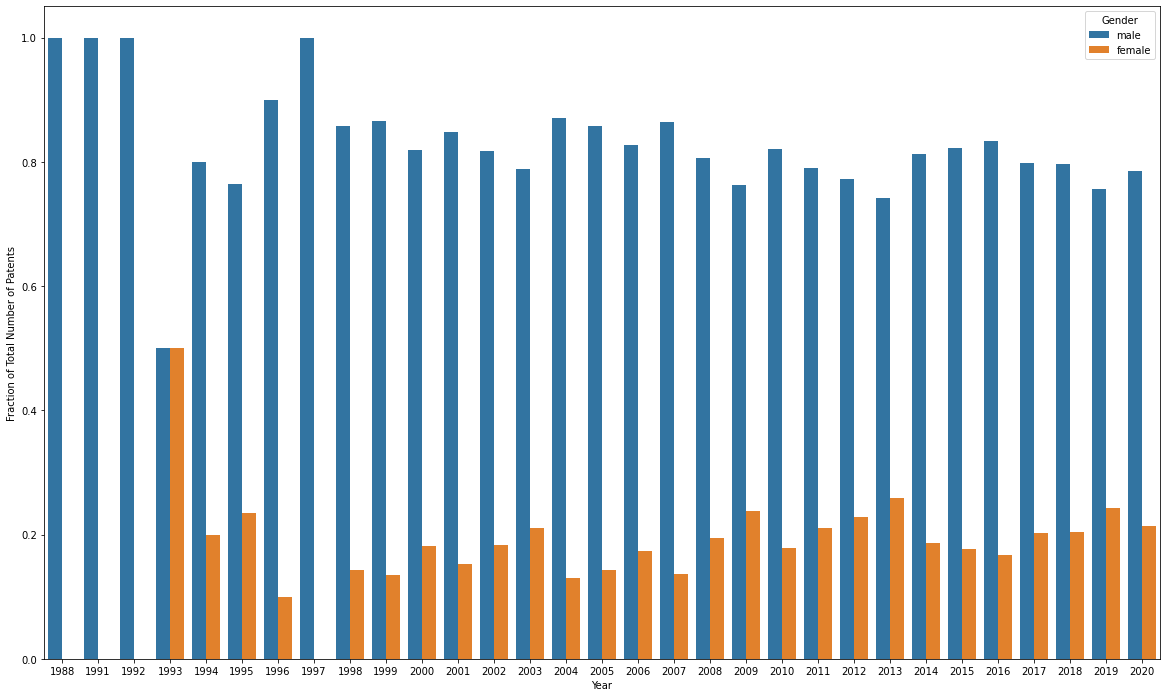

In [33]:
patents_year_norm = df_patents_nonan['Gender'].groupby(df_patents_nonan['Filing_Date'].dt.year).value_counts(normalize=True).to_frame('N_Patents').reset_index()
fig = plt.figure(figsize=(20, 12))
sns.barplot(x='Filing_Date', y='N_Patents', hue='Gender', data=patents_year_norm)
plt.xlabel('Year')
plt.ylabel('Fraction of Total Number of Patents')
print(patents_year_norm)

Here we see the disparity steadily decreasing from 2000 to 2010 and remaining roughly constant through 2011 to 2020. We have yet to acquire the working years of each professor in MIT so we cannot calculate the average number of patents per professor for each gender in each year, which might shed more light on how the disparity in gender has shifted over the year. Associated year for articles, conference proceedings and more patents will be scraped and analyzed to get a more complete picture.

#### Comparison of patent count by gender between old and new faculty members


Gender
female    1101
male      4816
Name: TotalPatentCount, dtype: int64
Gender
female     3
male      12
Name: TotalPatentCount, dtype: int64
Gender
female    3.657807
male      4.909276
Name: TotalPatentCount, dtype: float64
Gender
female    0.088235
male      0.142857
Name: TotalPatentCount, dtype: float64


<BarContainer object of 2 artists>

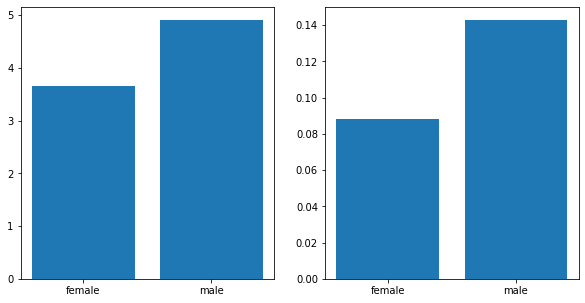

In [34]:
# start of prelim of deliverable 3
# Total patents counts by gender between old professors and new professors
Total_Patent_by_gender_sum_Old= df_old_prof.groupby('Gender')['TotalPatentCount'].sum()
print(Total_Patent_by_gender_sum_Old)
Total_Patent_by_gender_sum_New = df_new_prof.groupby('Gender')['TotalPatentCount'].sum()
print(Total_Patent_by_gender_sum_New)
# Mean of total patents counts by gender between old professors and new professors
Total_Patent_by_gender_mean_Old = df_old_prof.groupby('Gender')['TotalPatentCount'].mean()
print(Total_Patent_by_gender_mean_Old)
Total_Patent_by_gender_mean_New = df_new_prof.groupby('Gender')['TotalPatentCount'].mean()
print(Total_Patent_by_gender_mean_New)

gender =['female','male']
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,5))
ax1.bar(gender, Total_Patent_by_gender_mean_Old)
ax2.bar(gender, Total_Patent_by_gender_mean_New)

#### Comparison of conference proceedings count by gender between old and new faculty members

Gender
female     5147
male      17675
Name: TotalConfProcCount, dtype: int64
Gender
female    194
male      363
Name: TotalConfProcCount, dtype: int64
Gender
female    17.099668
male      18.017329
Name: TotalConfProcCount, dtype: float64
Gender
female    5.705882
male      4.321429
Name: TotalConfProcCount, dtype: float64


<BarContainer object of 2 artists>

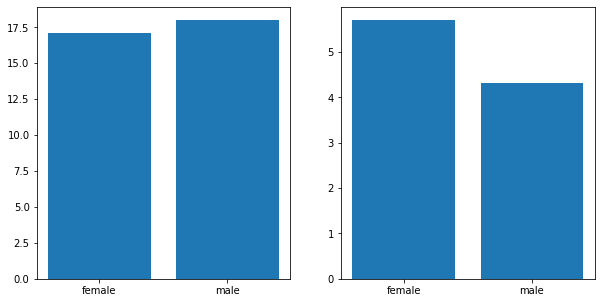

In [35]:
# Total conference proceedings counts by gender between old professors and new professors
Total_ConPro_by_gender_sum_Old= df_old_prof.groupby('Gender')['TotalConfProcCount'].sum()
print(Total_ConPro_by_gender_sum_Old)
Total_ConPro_by_gender_sum_New = df_new_prof.groupby('Gender')['TotalConfProcCount'].sum()
print(Total_ConPro_by_gender_sum_New)
# Mean of total conference proceedings counts by gender between old professors and new professors
Total_ConPro_by_gender_mean_Old = df_old_prof.groupby('Gender')['TotalConfProcCount'].mean()
print(Total_ConPro_by_gender_mean_Old)
Total_ConPro_by_gender_mean_New = df_new_prof.groupby('Gender')['TotalConfProcCount'].mean()
print(Total_ConPro_by_gender_mean_New)

gender =['female','male']
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,5))
ax1.bar(gender, Total_ConPro_by_gender_mean_Old)
ax2.bar(gender, Total_ConPro_by_gender_mean_New)

#### Comparison of article count by gender between old and new faculty members

Gender
female    23077
male      88696
Name: TotalArticleCount, dtype: int64
Gender
female    3156
male      4526
Name: TotalArticleCount, dtype: int64
Gender
female    76.667774
male      90.413863
Name: TotalArticleCount, dtype: float64
Gender
female    92.823529
male      53.880952
Name: TotalArticleCount, dtype: float64


<BarContainer object of 2 artists>

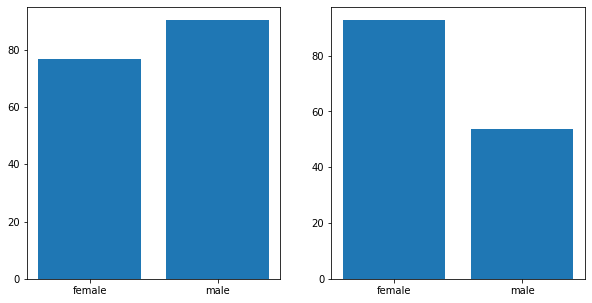

In [36]:
# Total article counts by gender between old professors and new professors
Total_Article_by_gender_sum_Old= df_old_prof.groupby('Gender')['TotalArticleCount'].sum()
print(Total_Article_by_gender_sum_Old)
Total_Article_by_gender_sum_New = df_new_prof.groupby('Gender')['TotalArticleCount'].sum()
print(Total_Article_by_gender_sum_New)
# Mean of total article counts by gender between old professors and new professors
Total_Article_by_gender_mean_Old = df_old_prof.groupby('Gender')['TotalArticleCount'].mean()
print(Total_Article_by_gender_mean_Old)
Total_Article_by_gender_mean_New = df_new_prof.groupby('Gender')['TotalArticleCount'].mean()
print(Total_Article_by_gender_mean_New)

gender =['female','male']
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,5))
ax1.bar(gender, Total_Article_by_gender_mean_Old)
ax2.bar(gender, Total_Article_by_gender_mean_New)

#### Overview of distribution of faculty members by ranking

['Professor' 'Associate' 'Other' 'Assistant' 'Lecturer']


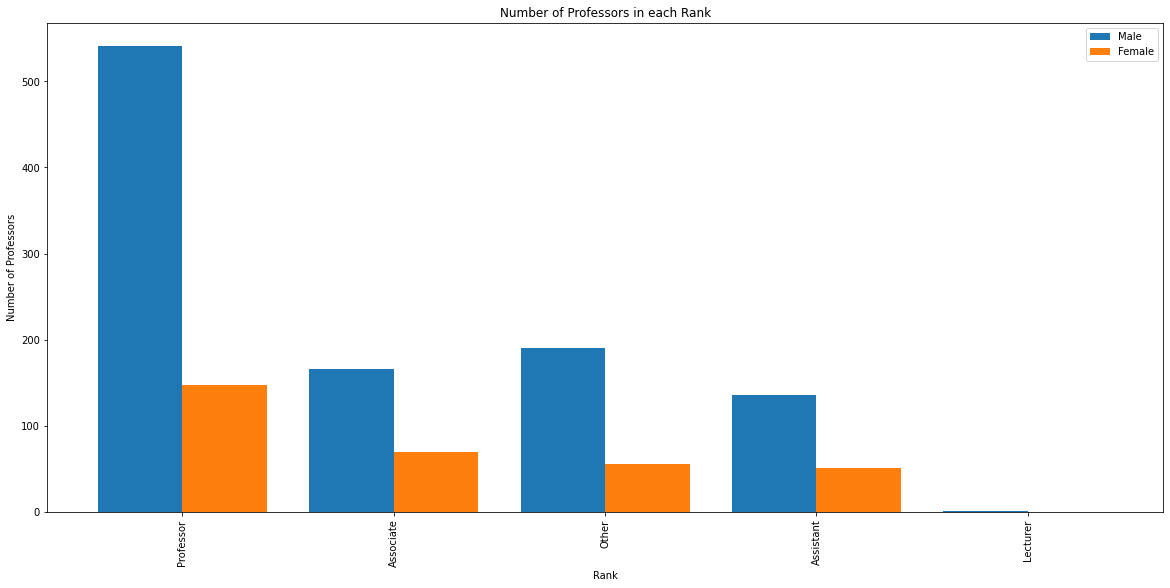

In [43]:
unique_rankings = dataset3['RankName'].unique()
print(unique_rankings)

def plot_gender_by_ranking():
    
    X = dataset3['RankName'].unique()
    #print(X)

    male = []
    female = []

    for rank in X:
        df = dataset3[dataset3['RankName'] == rank]
    
        group_male = df[df['Gender'] == 'male']
        group_female = df[df['Gender'] == 'female']
        male.append(group_male.shape[0])
        female.append(group_female.shape[0])

  

    f = plt.figure()
    f.set_figwidth(20)
    f.set_figheight(9)

    X_axis = np.arange(len(X))
  
    plt.bar(X_axis - 0.2, male, 0.4, label = 'Male')
    plt.bar(X_axis + 0.2, female, 0.4, label = 'Female')


    plt.xticks(X_axis, X, rotation = 90)
    plt.xlabel("Rank")
    plt.ylabel("Number of Professors")
    plt.title("Number of Professors in each Rank")
    plt.legend()

    plt.show()

plot_gender_by_ranking()

#### Comparison of patent count by gender between faculty members of different ranking
# Note, new prelim stuff for ranking, please add graph and delete this note!

In [44]:
# tpbgm = total patent by gender mean
# Mean of total patent counts by gender for each ranking
tpbgm_prof = df_professor.groupby('Gender')['TotalPatentCount'].mean()
print(tpbgm_prof)

tpbgm_associate = df_associate.groupby('Gender')['TotalPatentCount'].mean()
print(tpbgm_associate)

tpbgm_other = df_other.groupby('Gender')['TotalPatentCount'].mean()
print(tpbgm_other)

tpbgm_assistant = df_assistant.groupby('Gender')['TotalPatentCount'].mean()
print(tpbgm_assistant)

tpbgm_lec = df_lecturer.groupby('Gender')['TotalPatentCount'].mean()
print(tpbgm_lec)




Gender
female    5.544218
male      6.637708
Name: TotalPatentCount, dtype: float64
Gender
female    2.840580
male      3.915663
Name: TotalPatentCount, dtype: float64
Gender
female    1.160714
male      2.289474
Name: TotalPatentCount, dtype: float64
Gender
female    0.333333
male      0.970588
Name: TotalPatentCount, dtype: float64
Gender
male    0.0
Name: TotalPatentCount, dtype: float64


#### Comparison of Conference Proceeding count by gender between faculty members of different ranking

In [45]:
# tcpbgm = total conference proceeding by gender mean
# Mean of total conference proceeding counts by gender for each ranking
tcpbgm_prof = df_professor.groupby('Gender')['TotalConfProcCount'].mean()
print(tcpbgm_prof)

tcpbgm_associate = df_associate.groupby('Gender')['TotalConfProcCount'].mean()
print(tcpbgm_associate)

tcpbgm_other = df_other.groupby('Gender')['TotalConfProcCount'].mean()
print(tcpbgm_other)

tcpbgm_assistant = df_assistant.groupby('Gender')['TotalConfProcCount'].mean()
print(tcpbgm_assistant)

tcpbgm_lec = df_lecturer.groupby('Gender')['TotalConfProcCount'].mean()
print(tcpbgm_lec)

Gender
female    19.911565
male      21.101664
Name: TotalConfProcCount, dtype: float64
Gender
female    17.115942
male      11.427711
Name: TotalConfProcCount, dtype: float64
Gender
female    16.196429
male      17.694737
Name: TotalConfProcCount, dtype: float64
Gender
female    3.647059
male      6.485294
Name: TotalConfProcCount, dtype: float64
Gender
male    0.0
Name: TotalConfProcCount, dtype: float64


#### Comparison of Article count by gender between faculty members of different ranking

# Key question 1:
## Is there a statistically significant disparity by gender in patents, papers, and/or conference proceedings relative to the representation in each department or overall at MIT?

In [47]:
department_list = df_prof_dep_dup['Department_MITCollab'].unique()
fields_of_interest = ['TotalPatentCount', 'TotalArticleCount', 'TotalConfProcCount']
#import researchpy as rp
import scipy.stats as stats
# testing at Confidence level 95%
alpha = 0.05

### Test on disparity by gender overall and by Departments on patents, papers and conference proceedings

In [48]:
#function that returns False if H0 is rejected, otherwise True
# by default the progress boolean value is false so the function does not print its findings
def t_test_on_field(df, progress = False):
    all_field_result = []

    for field in fields_of_interest:
        if(progress):
            print("Current field of interest is: ", field)
    
        
        group_male = df[field][df['Gender'] == 'male']
        group_female = df[field][df['Gender'] == 'female']
        
        #print(group_male.shape[0])
        #print(group_female.shape[0])
        
        mnob = 0
        mmean = 0
        mvar = 0
        fnob = 0
        fmean = 0
        fvar = 0
        
        if (group_male.shape[0] > 0):
            mnob, _ , mmean, mvar, _, _ = stats.describe(group_male)
        
        if (group_female.shape[0] > 0):
            fnob, _ , fmean, fvar, _, _ = stats.describe(group_female)
    
        
        mstd = mvar ** 0.5
        fstd = fvar ** 0.5
        
        # a flag bit, 1 if male mean is higher and 0 if vice versa
        higher_bit = 0
        if mmean > fmean:
            higher_bit = 1
    
        _, pv = stats.levene(group_male,
                 group_female,
                 center= 'mean')
        
        if pv >= alpha:
            # insignificant pv, identical variation
            # t-test on H0: mean of male = mean of female
            stat, p_value = stats.ttest_ind_from_stats( mean1= mmean, std1= mstd, nobs1= mnob,

                                        mean2= fmean, std2= fstd, nobs2= fnob)
            if p_value < alpha:
                # t-test result reject H0, significantly different
                all_field_result.append((False, higher_bit))
                if(progress):
                    print("Test result: False")
            else:
                all_field_result.append((True, -1))
                if(progress):
                    print("Test result: True")
        else:
            # significant pv, un-identical variation
            # t-test on H0: mean of male = mean of female
            stat, p_value = stats.ttest_ind_from_stats( mean1= mmean, std1= mstd, nobs1= mnob,

                                        mean2= fmean, std2= fstd, nobs2= fnob, equal_var = False)
            
            if p_value < alpha:
                # t-test result reject H0, significantly different
                all_field_result.append((False, higher_bit))
                if(progress):
                    print("Test result: False")
            else:
                all_field_result.append((True, -1))
                if(progress):
                    print("Test result: True")
    
    total_points = df.shape[0]
    warning = False
    male_count = df[df['Gender'] == 'male'].shape[0]
    female_count = df[df['Gender'] == 'female'].shape[0]
    if (male_count == 0 or female_count == 0):
        warning = True
    
    
    return (all_field_result, total_points, warning)

In [51]:
test_res_overall = t_test_on_field(df_prof)
print(test_res_overall)

([(True, -1), (True, -1), (True, -1)], 2015, False)


In [52]:
# a function that runs the test above for each department
# by default the progress boolean value is false so the function does not print its findings
def t_test_per_dept(df, progress = False):
    total_result = []
    
    for dept in department_list:
        if(progress):
            print("Current Department: ", dept)
        
        # chenge the following line to df2 = df[df["Department"] == dept] to test on none-duplicate datasets
        df2 = df[df["Department_MITCollab"] == dept]

        res = t_test_on_field(df2, progress)
        total_result.append(res)
        if(progress):
            print()
    return total_result

In [53]:
test_res_per_dept = t_test_per_dept(df_prof_dep_dup)
print(test_res_per_dept)

[([(True, -1), (True, -1), (True, -1)], 51, False), ([(True, -1), (True, -1), (True, -1)], 2015, False), ([(True, -1), (True, -1), (True, -1)], 2015, False), ([(True, -1), (True, -1), (True, -1)], 2015, False), ([(True, -1), (True, -1), (True, -1)], 2015, False), ([(True, -1), (True, -1), (True, -1)], 2015, False), ([(True, -1), (True, -1), (True, -1)], 68, False), ([(True, -1), (True, -1), (True, -1)], 45, False), ([(True, -1), (True, -1), (True, -1)], 29, False), ([(True, -1), (True, -1), (True, -1)], 10, False), ([(True, -1), (True, -1), (True, -1)], 9, False), ([(True, -1), (False, 1), (True, -1)], 39, False), ([(True, -1), (True, -1), (True, -1)], 39, False), ([(True, -1), (True, -1), (True, -1)], 36, False), ([(True, -1), (True, -1), (True, -1)], 42, False), ([(False, 1), (False, 1), (False, 1)], 71, False), ([(True, -1), (True, -1), (True, -1)], 41, False), ([(False, 1), (True, -1), (False, 1)], 42, False), ([(True, -1), (True, -1), (True, -1)], 35, False), ([(True, -1), (True, 

C:\Users\SamuelFu\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2603: RuntimeWarning: invalid value encountered in double_scalars
  W = numer / denom


#### Summary and Interpretation of the results!

In [54]:
def single_summary_decoder(results):
    num = results[1]
    warning = results[2]
    print("There were ", num, "independent data points in this set")
    print()
    if warning:
        print("There was either 0 Male or 0 Female in this given subset, therefore the comparison result is invalid")
    else:
        
        for i in range(len(fields_of_interest)):
            #function that returns False if H0 is rejected, otherwise True
            res = results[0][i][0]
            print("For ", fields_of_interest[i], " the result is: ", res)
            print()
            if res:
                #res = true, H0 fail to reject
                print("This meant that at alpha = ", alpha, ", we failed to reject the Null Hypothesis")
                print("Conclusion: ")
                print("We don't have evidence to prove that the there is a significant disparity", 
                      " by gender in ", fields_of_interest[i], " relative to the representation")
                
            else:
                #res = false, H0 is rejected
                print("This meant that at alpha = ", alpha, ", we reject the Null Hypothesis and accept the Alternative Hypothesis")
                print("Conclusion: ")
                if(results[0][i][1] == 0):
                    print("There is a significant disparity", 
                          " by gender in ", fields_of_interest[i], " relative to the representation.",
                         " In this specific test, the mean of female is statistically significantly greater than", 
                         " the mean of male.")
                elif(results[0][i][1] == 1):
                    print("There is a significant disparity", 
                          " by gender in ", fields_of_interest[i], " relative to the representation.",
                         " In this specific test, the mean of male is statistically significantly greater than", 
                         " the mean of female.")
                else:
                    print("ERROR: undefined behavior")
                    
            print()
            print()


def all_dept_decoder(results):
    for i in range(len(department_list)):
        print("For department: ", department_list[i], " the result are: ")
        print()
        single_summary_decoder(results[i])
        
        print()
        print("************************************************************************************************")
        print()
        print()

In [55]:
single_summary_decoder(test_res_overall)

There were  2015 independent data points in this set

For  TotalPatentCount  the result is:  True

This meant that at alpha =  0.05 , we failed to reject the Null Hypothesis
Conclusion: 
We don't have evidence to prove that the there is a significant disparity  by gender in  TotalPatentCount  relative to the representation


For  TotalArticleCount  the result is:  True

This meant that at alpha =  0.05 , we failed to reject the Null Hypothesis
Conclusion: 
We don't have evidence to prove that the there is a significant disparity  by gender in  TotalArticleCount  relative to the representation


For  TotalConfProcCount  the result is:  True

This meant that at alpha =  0.05 , we failed to reject the Null Hypothesis
Conclusion: 
We don't have evidence to prove that the there is a significant disparity  by gender in  TotalConfProcCount  relative to the representation




In [56]:
all_dept_decoder(test_res_per_dept)

For department:  Aeronautics and Astronautics  the result are: 

There were  51 independent data points in this set

For  TotalPatentCount  the result is:  True

This meant that at alpha =  0.05 , we failed to reject the Null Hypothesis
Conclusion: 
We don't have evidence to prove that the there is a significant disparity  by gender in  TotalPatentCount  relative to the representation


For  TotalArticleCount  the result is:  True

This meant that at alpha =  0.05 , we failed to reject the Null Hypothesis
Conclusion: 
We don't have evidence to prove that the there is a significant disparity  by gender in  TotalArticleCount  relative to the representation


For  TotalConfProcCount  the result is:  True

This meant that at alpha =  0.05 , we failed to reject the Null Hypothesis
Conclusion: 
We don't have evidence to prove that the there is a significant disparity  by gender in  TotalConfProcCount  relative to the representation



*********************************************************

#### quick view for results on department

In [57]:
def quick_dictionary(results):
    
    warning = results[2]
    
    if warning:
        return ["invalid", "invalid", "invalid"]
    else:
        temp = []
        for i in range(len(fields_of_interest)):
            #function that returns False if H0 is rejected, otherwise True
            res = results[0][i][0]
            
            if res:
                #res = true, H0 fail to reject
                temp.append("No Disparity")
                
            else:
                #res = false, H0 is rejected
                
                if(results[0][i][1] == 0):
                
                    temp.append("Female")
                elif(results[0][i][1] == 1):
                    
                    temp.append("Male")

        return temp 
            


def all_dept_quickV(results):
    results_table = {}
    print("Legend: Male = mean of male is significantly greater than mean of female")
    print("        Female = mean of female is significantly greater than mean of male")
    print("        Invalid = not enough data to perform test")
    print("        No Disparity = no disparity found")
    for i in range(len(department_list)):
        definition = quick_dictionary(results[i])
        results_table.update({department_list[i]: definition})
    print("{:<50} {:<15} {:<15} {:<15}".format('Department', 'Patent', 'Article', 'Conference Proceedings'))
    for k,v in results_table.items():
        p, a, c = v
        print("{:<50} {:<15} {:<15} {:<15}".format(k, p, a, c))


all_dept_quickV(test_res_per_dept)

Legend: Male = mean of male is significantly greater than mean of female
        Female = mean of female is significantly greater than mean of male
        Invalid = not enough data to perform test
        No Disparity = no disparity found
Department                                         Patent          Article         Conference Proceedings
Aeronautics and Astronautics                       No Disparity    No Disparity    No Disparity   
Electrical Engineering and Computer Sciences       No Disparity    No Disparity    No Disparity   
Health Sciences and Technology                     No Disparity    No Disparity    No Disparity   
Management                                         No Disparity    No Disparity    No Disparity   
Mechanical Engineering                             No Disparity    No Disparity    No Disparity   
Physics                                            No Disparity    No Disparity    No Disparity   
Earth, Atmospheric and Planetary Sciences          No Dispar

# Key Question 2

## Has this disparity changed over time and, if so, in what way?

In [58]:
df_patents_nonan['Year'] = pd.to_datetime(df_patents_nonan['Filing_Date']).dt.year
def match_gender(df):
    genders = []

    for author_id in df['Id'].astype(str).tolist():
        gender = df_prof['Gender'][df_prof['Id'].astype(str) == author_id].tolist()[0]
        
        genders.append(gender)
        

    df['Gender'] = genders
    return df

#years = [2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
years = [2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]

yearly_stats = []
for year in years:
    file_name = "prof_year/" + str(year) +".csv"
    df = pd.read_csv(file_name)
    df = match_gender(df)
    
    num_male = df[df['Gender'] == 'male'].shape[0]
    num_female = df[df['Gender'] == 'female'].shape[0]
    total_prof = num_male + num_female
    male_percent = num_male / total_prof
    female_percent = num_female / total_prof
    yearly_stats.append([male_percent, female_percent])

#for each year it is [% male, % female]
print(yearly_stats)

[[0.7766439909297053, 0.2233560090702948], [0.7767955801104972, 0.22320441988950276], [0.7778947368421053, 0.22210526315789475], [0.7796257796257796, 0.2203742203742204], [0.7785642062689585, 0.22143579373104147], [0.7729468599033816, 0.22705314009661837], [0.7791353383458647, 0.22086466165413535], [0.7708920187793428, 0.2291079812206573], [0.7747252747252747, 0.22527472527472528], [0.7688123300090662, 0.23118766999093382], [0.7686170212765957, 0.23138297872340424], [0.7690941385435168, 0.23090586145648312], [0.7661996497373029, 0.23380035026269702], [0.7682819383259912, 0.23171806167400882], [0.7729296527159395, 0.22707034728406056], [0.7684021543985637, 0.23159784560143626], [0.771505376344086, 0.22849462365591397]]


In [59]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def percent_by_year(dataframe):
    yearly_percent = []

    for year in years:
        df = dataframe[dataframe['Year'] == year]
        num_male = df[df['Gender'] == 'male'].shape[0]
        num_female = df[df['Gender'] == 'female'].shape[0]
        male_p = num_male / (num_male + num_female)
        female_p = num_female / (num_male + num_female)
        yearly_percent.append([male_p, female_p])
    
    return yearly_percent

def lingress_and_test(Dindex, gender0):
    
    years_by_2004 = [(x - 2004) for x in years]

    res = stats.linregress(years_by_2004, Dindex)
    
    label_text = 'Fitted line for ' + gender0
    title_text = "Disparity Index for " + gender0 + " over time"

    x = np.array(years_by_2004)

    plt.plot(years_by_2004, Dindex, 'o')
    plt.plot(x, res.intercept + res.slope*x, 'r', label = label_text)
    plt.xlabel("Number of years since 2004")
    plt.ylabel("Disparity Index")
    plt.title(title_text)
    plt.show()

    slope = res.slope
    pvalue = res.pvalue

    print("The slope for this linear regression is ", slope)
    print("The p-value for the slope is ", pvalue)
    print("Testing on Null Hypothesis: slope = 0 VS Alternative Hypothesis: slope != 0")
    if(pvalue < 0.05):
        print("The pvalue is less than alpha = 0.05, we reject the null hypothesis.")
        if(slope > 0):
            print("The slope value is statistically significant. We see an increase in the disparity index over time.")
        else:
            print("The slope value is statistically significant. We see a decrease in the disparity index over time.")

    else:
        print("The pvalue is greater than alpha = 0.05, we fail to reject the null hypothesis.")
        print("There isn't enough evidence to disprove the null hypothesis")

def disparity_calc_and_plot(percentages, field_name):
    X = years
    male = []
    female = []

    for i in range(len(X)):
        male_di = percentages[i][0] / yearly_stats[i][0]
        female_di = percentages[i][1] / yearly_stats[i][1]
        
        male.append(male_di)
        female.append(female_di)

    f = plt.figure()
    f.set_figwidth(20)
    f.set_figheight(9)

    X_axis = np.arange(len(X))
  
    plt.bar(X_axis - 0.2, male, 0.4, label = 'Male')
    plt.bar(X_axis + 0.2, female, 0.4, label = 'Female')

    title = "Disparity Index of Male and Female in " + field_name + " from 2004 - 2020"

    plt.xticks(X_axis, X, rotation = 90)
    plt.xlabel("Year")
    plt.ylabel("Disparity Index")
    plt.title(title)
    plt.legend()

    plt.show()

    lingress_and_test(male, "male")

    lingress_and_test(female, "female")
    


    return male, female

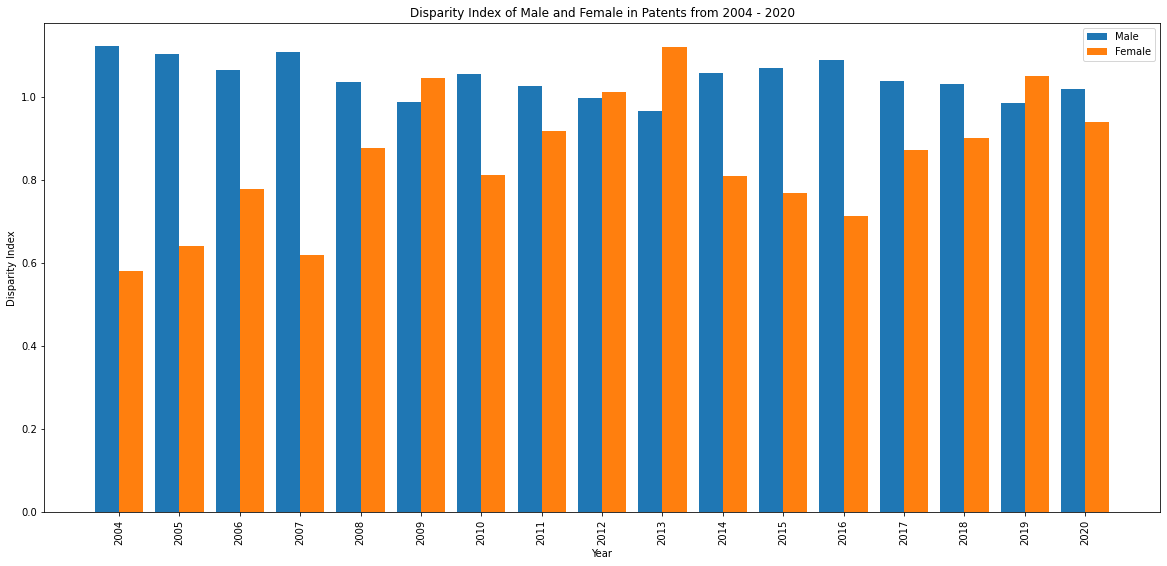

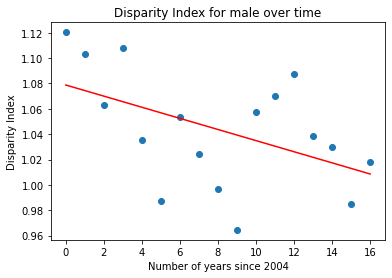

The slope for this linear regression is  -0.0043846357028153905
The p-value for the slope is  0.04831457831254603
Testing on Null Hypothesis: slope = 0 VS Alternative Hypothesis: slope != 0
The pvalue is less than alpha = 0.05, we reject the null hypothesis.
The slope value is statistically significant. We see a decrease in the disparity index over time.


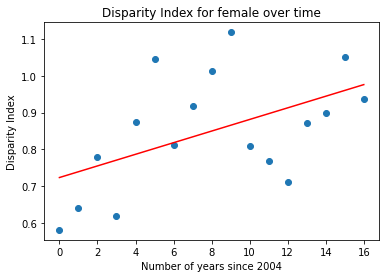

The slope for this linear regression is  0.015762439213224743
The p-value for the slope is  0.03806904746307863
Testing on Null Hypothesis: slope = 0 VS Alternative Hypothesis: slope != 0
The pvalue is less than alpha = 0.05, we reject the null hypothesis.
The slope value is statistically significant. We see an increase in the disparity index over time.


In [60]:
patent_yearly_percent = percent_by_year(df_patents_nonan)
#print(patent_yearly_percent)
a, b = disparity_calc_and_plot(patent_yearly_percent, "Patents")

The disparity index is calculated using the following formula D = P_i / P_j. Where P_i is the percent of patents for male/female for a given year and P_j is the percent of male/female working professors in MIT for a given year (data scraped from MIT collaboration website). Based on the plot above, we can see that the Disparity Index for male remained generally constant, distributed around 1.0. The Disparity Index for female patent inventors shows a gradual increase, from around 0.6 to around 0.8 in the recent years. This observation is also supported by the linear regression on the disparity indexes. For male we reject the null hypothesis which means that with 95% confidence the slope is significant, however the value of the slope is very small, suggesting a very slow decrease. For female we rejected the null hypothsis which means that with 95% confidence we conclude that the slope is not 0, in this case positive, which means it is increasing over time.

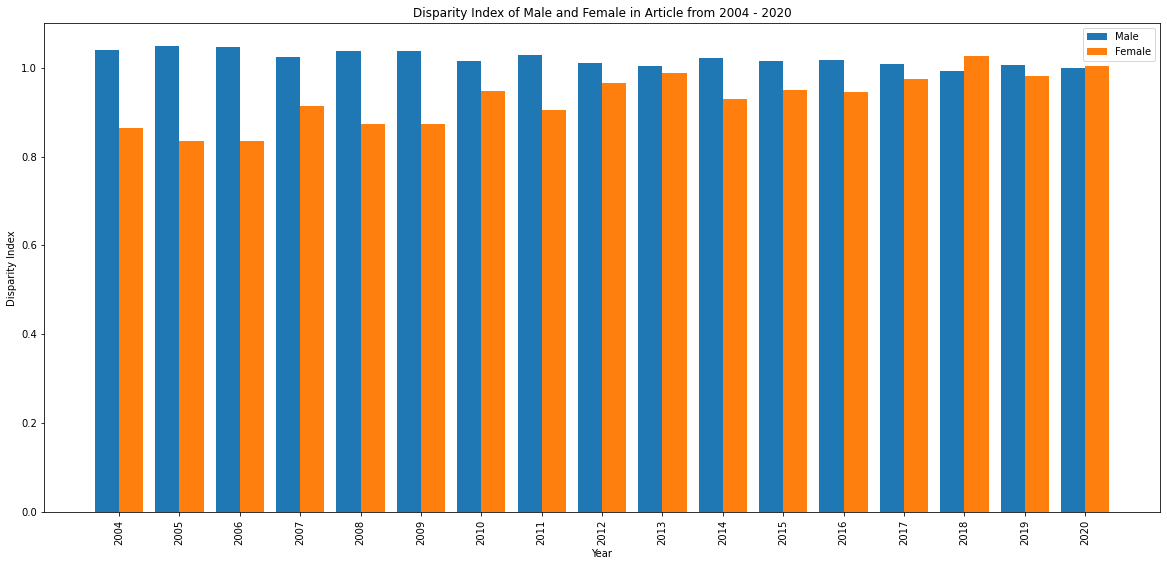

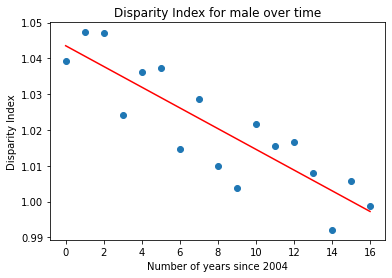

The slope for this linear regression is  -0.0028916755685639973
The p-value for the slope is  5.43548687350441e-06
Testing on Null Hypothesis: slope = 0 VS Alternative Hypothesis: slope != 0
The pvalue is less than alpha = 0.05, we reject the null hypothesis.
The slope value is statistically significant. We see a decrease in the disparity index over time.


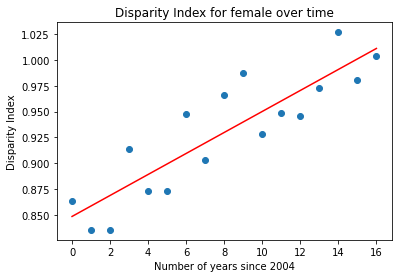

The slope for this linear regression is  0.010170130022332129
The p-value for the slope is  3.4622207540450577e-06
Testing on Null Hypothesis: slope = 0 VS Alternative Hypothesis: slope != 0
The pvalue is less than alpha = 0.05, we reject the null hypothesis.
The slope value is statistically significant. We see an increase in the disparity index over time.


In [61]:
article_yearly_percent = percent_by_year(df_articles)
#print(article_yearly_percent)
c, d = disparity_calc_and_plot(article_yearly_percent, "Article")

The disparity index is calculated using the following formula D = P_i / P_j. Where P_i is the percent of article for male/female for a given year and P_j is the percent of male/female working professors in MIT for a given year (data scraped from MIT collaboration website). Based on the plot above, we can see that the Disparity Index for male professors remained generally constant. The Disparity Index for female professors also stayed relatively constant, perhaps a very small increase over the years. This observation is partly supported by the linear regression on the disparity indexes. For male we reject the null hypothesis which means that with 95% confidence the slope is significant, however the value of the slope is relatively small, suggesting a very slow decrease. For female we rejected the null hypothsis which means that with 95% confidence we conclude that the slope is not 0, in this case positive, which means it is increasing over time.

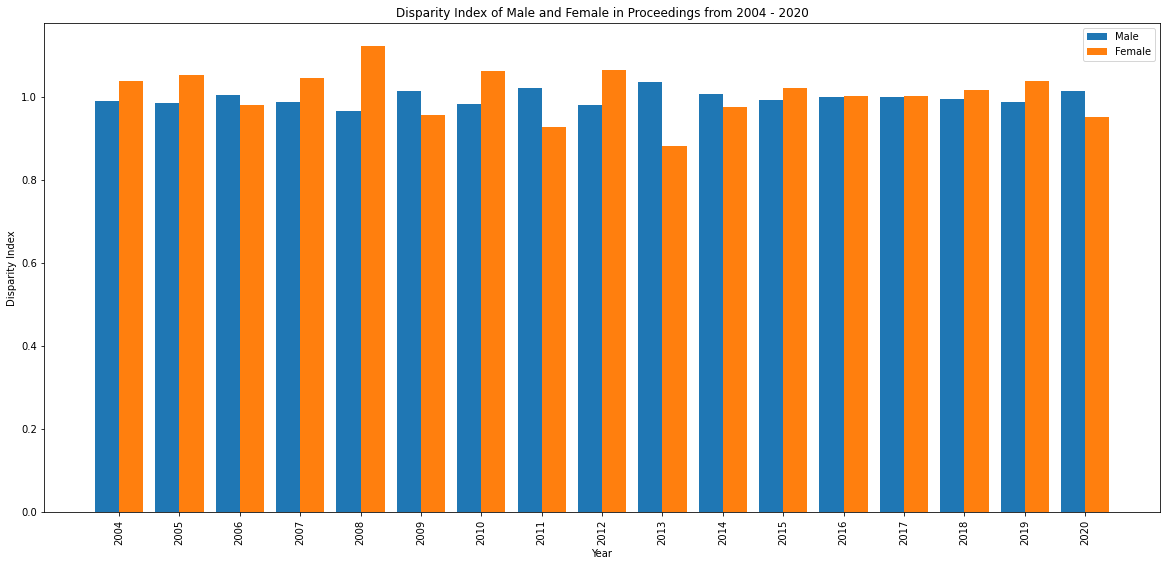

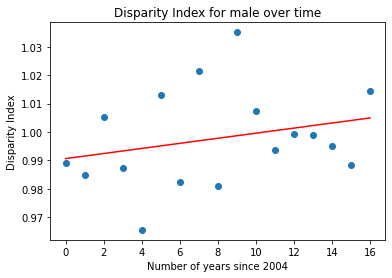

The slope for this linear regression is  0.0008958261851047425
The p-value for the slope is  0.30360573929582535
Testing on Null Hypothesis: slope = 0 VS Alternative Hypothesis: slope != 0
The pvalue is greater than alpha = 0.05, we fail to reject the null hypothesis.
There isn't enough evidence to disprove the null hypothesis


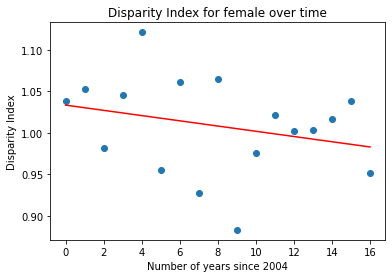

The slope for this linear regression is  -0.003154003038510479
The p-value for the slope is  0.28889420261801646
Testing on Null Hypothesis: slope = 0 VS Alternative Hypothesis: slope != 0
The pvalue is greater than alpha = 0.05, we fail to reject the null hypothesis.
There isn't enough evidence to disprove the null hypothesis


In [62]:
proceedings_yearly_percent = percent_by_year(df_proceedings)
#print(proceedings_yearly_percent)
e, f = disparity_calc_and_plot(proceedings_yearly_percent, "Proceedings")

The disparity index is calculated using the following formula D = P_i / P_j. Where P_i is the percent of proceedings for male/female for a given year and P_j is the percent of male/female working professors in MIT for a given year (data scraped from MIT collaboration website). Based on the plot above, we can see that the Disparity Index for male remained generally constant. The Disparity Index for female professors also remained relatively constant. The two disparity indices converged on to 1.0 in the recent years, sugggesting we have reached parity. These observations are supported by the linear regression tests on male and female disparity indexes. Where both slopes has failed the hypothesis test, suggesting that we don't have enough evidence to prove that the slope is not 0 at confidence level of 95%.

# Key Question 3:

## Are newer professors (professors who have been at MIT less than ten years) experiencing similar gaps to older professors?

In [63]:
fields_of_interest = ['TotalPatentCount', 'TotalArticleCount', 'TotalConfProcCount']
import scipy.stats as stats

# testing at Confidence level 95%
alpha = 0.05



In [73]:
#function that returns False if H0 is rejected, otherwise True

def t_test_on_field(df, progress = False):
    all_field_result = []

    for field in fields_of_interest:
        if(progress):
            print("Current field of interest is: ", field)
    
        
        group_male = df[field][df['Gender'] == 'male']
        group_female = df[field][df['Gender'] == 'female']
        
        #print(group_male.shape[0])
        #print(group_female.shape[0])
        
        mnob = 0
        mmean = 0
        mvar = 0
        fnob = 0
        fmean = 0
        fvar = 0
        
        if (group_male.shape[0] > 0):
            mnob, _ , mmean, mvar, _, _ = stats.describe(group_male)
        
        if (group_female.shape[0] > 0):
            fnob, _ , fmean, fvar, _, _ = stats.describe(group_female)
    
        
        mstd = mvar ** 0.5
        fstd = fvar ** 0.5
        
        # a flag bit, 1 if male mean is higher and 0 if vice versa
        higher_bit = 0
        if mmean > fmean:
            higher_bit = 1
    
        _, pv = stats.levene(group_male,
                 group_female,
                 center= 'mean')
        
        if pv >= alpha:
            # insignificant pv, identical variation
            # t-test on H0: mean of male = mean of female
            stat, p_value = stats.ttest_ind_from_stats( mean1= mmean, std1= mstd, nobs1= mnob,

                                        mean2= fmean, std2= fstd, nobs2= fnob)
            if p_value < alpha:
                # t-test result reject H0, significantly different
                all_field_result.append((False, higher_bit))
                if(progress):
                    print("Test result: False")
            else:
                all_field_result.append((True, -1))
                if(progress):
                    print("Test result: True")
        else:
            # significant pv, un-identical variation
            # t-test on H0: mean of male = mean of female
            stat, p_value = stats.ttest_ind_from_stats( mean1= mmean, std1= mstd, nobs1= mnob,

                                        mean2= fmean, std2= fstd, nobs2= fnob, equal_var = False)
            
            if p_value < alpha:
                # t-test result reject H0, significantly different
                all_field_result.append((False, higher_bit))
                if(progress):
                    print("Test result: False")
            else:
                all_field_result.append((True, -1))
                if(progress):
                    print("Test result: True")
    
    total_points = df.shape[0]
    warning = False
    male_count = df[df['Gender'] == 'male'].shape[0]
    female_count = df[df['Gender'] == 'female'].shape[0]
    if (male_count == 0 or female_count == 0):
        warning = True
    
    
    return (all_field_result, total_points, warning)

In [74]:
test_res_overall = t_test_on_field(df_prof2)
print(test_res_overall)



test_res_overall_old = t_test_on_field(df_old_prof)
print(test_res_overall_old)

test_res_overall_new = t_test_on_field(df_new_prof)
print(test_res_overall_new)




([(True, -1), (True, -1), (True, -1)], 1400, False)
([(True, -1), (True, -1), (True, -1)], 1282, False)
([(True, -1), (True, -1), (True, -1)], 118, False)


In [75]:
print("Summary")
print()
print("For Total Patent Count")
print("Overall: ", test_res_overall[0][0][0], " Older: ", test_res_overall_old[0][0][0], " New: ", test_res_overall_new[0][0][0])
print("For Total Article Count")
print("Overall: ", test_res_overall[0][1][0], " Older: ", test_res_overall_old[0][1][0], " New: ", test_res_overall_new[0][1][0])
print("For Total Conference Proceedings Count")
print("Overall: ", test_res_overall[0][2][0], " Older: ", test_res_overall_old[0][2][0], " New: ", test_res_overall_new[0][2][0])
print()
print("Legend: True := H0 not rejected, no evidence for disparity, False := H0 rejected, significant disparity")

Summary

For Total Patent Count
Overall:  True  Older:  True  New:  True
For Total Article Count
Overall:  True  Older:  True  New:  True
For Total Conference Proceedings Count
Overall:  True  Older:  True  New:  True

Legend: True := H0 not rejected, no evidence for disparity, False := H0 rejected, significant disparity


## Interpretation of the results
### Comparing disparity between male and female professors who joined MIT before 2011 and after 2011

#### Patent Count:
The test showed that there was no disparity between male and female professors overall, between older professors and newer professors.

#### Article Count:
The test showed that there was no disparity between male and female professors overall, between older professors and newer professors.

#### Conference Proceedings Count:
The test showed that there was no disparity between male and female professors overall, between older professors and newer professors.


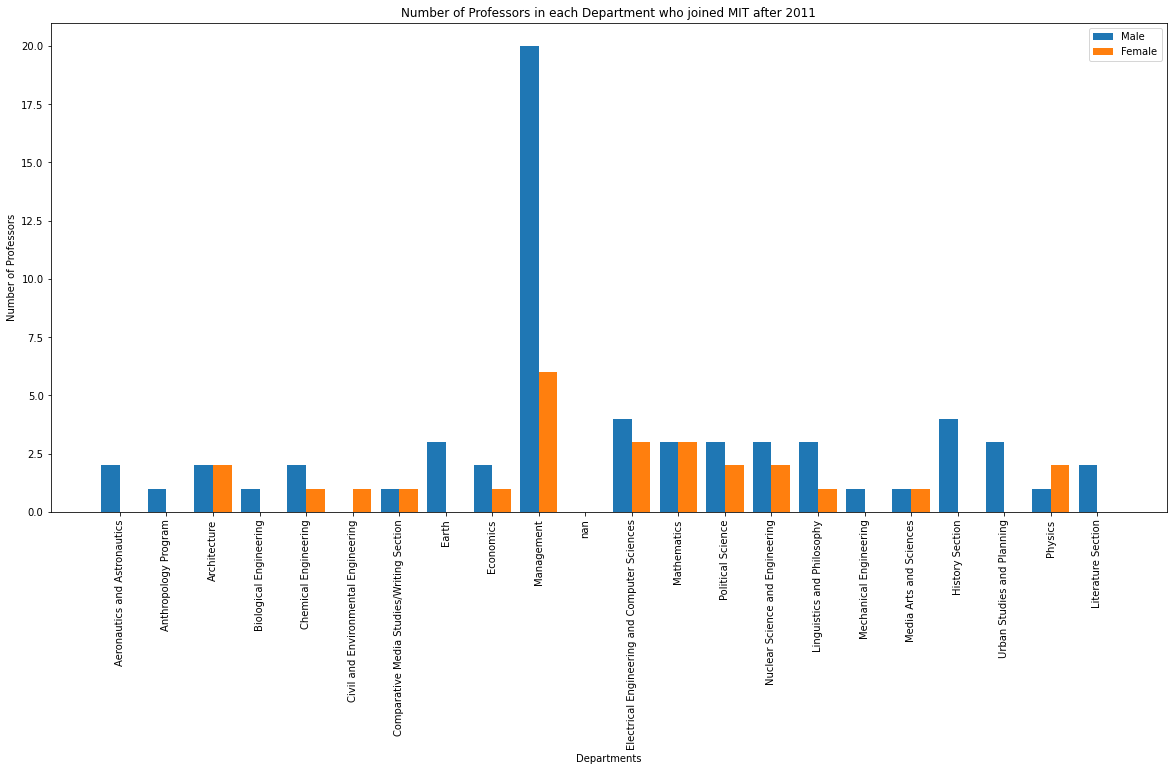

In [76]:
import numpy as np
import matplotlib.pyplot as plt

X = df_new_prof['Department'].unique()
#print(X)

male = []
female = []

for dept in X:
    df = df_new_prof[df_new_prof['Department'] == dept]
    
    group_male = df[df['Gender'] == 'male']
    group_female = df[df['Gender'] == 'female']
    male.append(group_male.shape[0])
    female.append(group_female.shape[0])

  

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(9)

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female, 0.4, label = 'Female')


plt.xticks(X_axis, X, rotation = 90)
plt.xlabel("Departments")
plt.ylabel("Number of Professors")
plt.title("Number of Professors in each Department who joined MIT after 2011")
plt.legend()

plt.show()

This graph shows the number of professors in each Department who joined MIT after 2011. Most departments received less than 5 new members regardless of gender, the only outlier is for the department Management with 18 male and 8 female faculty members who joined after 2011. However the dataset is still too small to support a meaningful test for each department. Therefore there will only be tests on the entire MIT.

#### A new approach
Due to the limited size of the dataset for professors who joined after 2011 (118 faculty memebers in total), we attempted to partition the dataset in another way. Where df_prof_short holds faculty members who worked for less than or equal to 10 years in MIT, and df_prof_long holds faculty members who worked in MIT for more than 10 years.

In [77]:
df_prof_short = df_prof2[df_prof2['Work_year'] <= 10]
df_prof_long = df_prof2[df_prof2['Work_year'] > 10]

print(df_prof2.shape)
print(df_prof_short.shape)
print(df_prof_long.shape)

(1400, 20)
(200, 20)
(1200, 20)


In [78]:
test_res_overall = t_test_on_field(df_prof2)
print(test_res_overall)



test_res_short = t_test_on_field(df_prof_short)
print(test_res_short)

test_res_long = t_test_on_field(df_prof_long)
print(test_res_long)

([(True, -1), (True, -1), (True, -1)], 1400, False)
([(True, -1), (True, -1), (True, -1)], 200, False)
([(True, -1), (True, -1), (True, -1)], 1200, False)


In [79]:
print()
print()
print("Summary")
print()
print("For Total Patent Count")
print("Overall: ", test_res_overall[0][0][0], " Older: ", test_res_long[0][0][0], " New: ", test_res_short[0][0][0])
print("For Total Article Count")
print("Overall: ", test_res_overall[0][1][0], " Older: ", test_res_long[0][1][0], " New: ", test_res_short[0][1][0])
print("For Total Conference Proceedings Count")
print("Overall: ", test_res_overall[0][2][0], " Older: ", test_res_long[0][2][0], " New: ", test_res_short[0][2][0])
print()
print("Legend: True := H0 not rejected, no evidence for disparity, False := H0 rejected, significant disparity")



Summary

For Total Patent Count
Overall:  True  Older:  True  New:  True
For Total Article Count
Overall:  True  Older:  True  New:  True
For Total Conference Proceedings Count
Overall:  True  Older:  True  New:  True

Legend: True := H0 not rejected, no evidence for disparity, False := H0 rejected, significant disparity


## Interpretation of the results
### Comparing disparity between male and female professors who has worked in MIT for less than or equal to 10 years vs more than 10 years

#### Patent Count:
The test showed that there was no disparity between male and female professors overall, between older professors and newer professors.

#### Article Count:
The test showed that there was no disparity between male and female professors overall, between older professors and newer professors.

#### Conference Proceedings Count:
The test showed that there was no disparity between male and female professors overall, between older professors and newer professors.

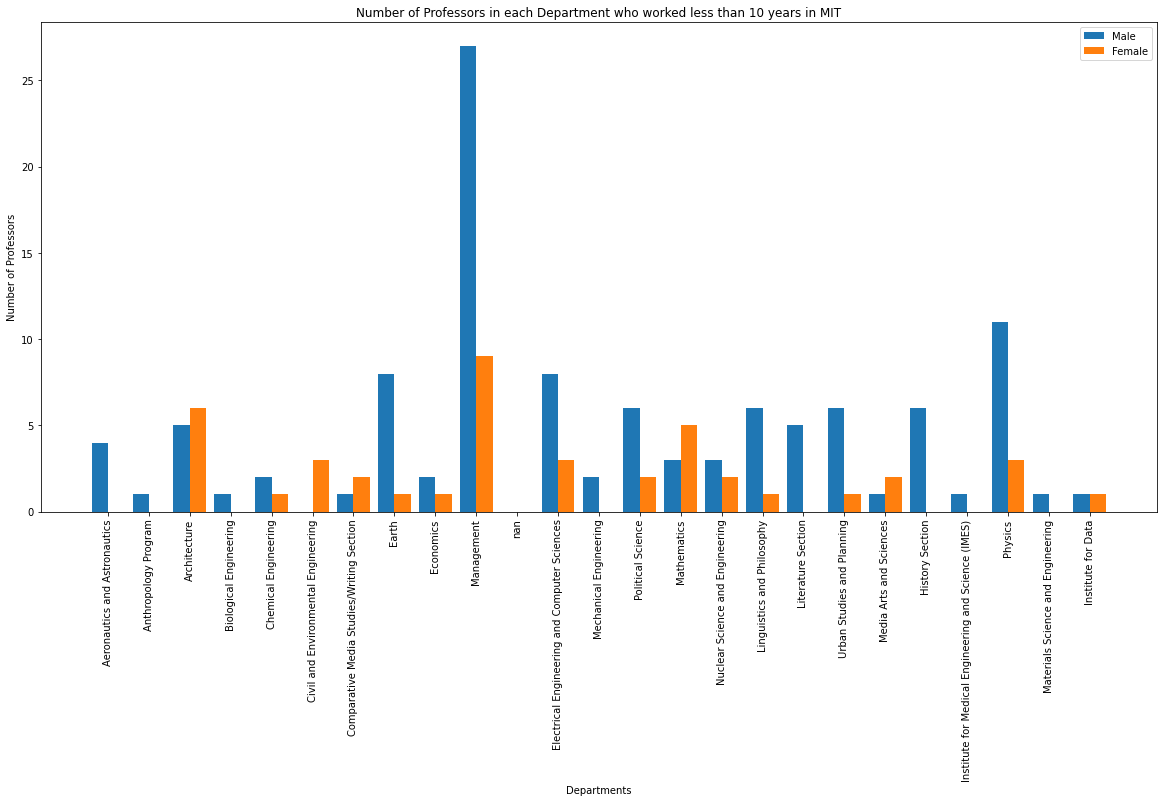

In [80]:
X = df_prof_short['Department'].unique()
#print(X)

male = []
female = []

for dept in X:
    df = df_prof_short[df_prof_short['Department'] == dept]
    
    group_male = df[df['Gender'] == 'male']
    group_female = df[df['Gender'] == 'female']
    male.append(group_male.shape[0])
    female.append(group_female.shape[0])

  

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(9)

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female, 0.4, label = 'Female')


plt.xticks(X_axis, X, rotation = 90)
plt.xlabel("Departments")
plt.ylabel("Number of Professors")
plt.title("Number of Professors in each Department who worked less than 10 years in MIT")
plt.legend()

plt.show()




This graph shows the number of professors in each Department who worked in MIT for less than or equal to 10 years. Although the situation has improved compared to the previous plot, the number of professors in each department still isn't enough to support individual tests on each department.

#### Test for disparity based on faculty ranking

In [81]:
# reminder the available rankings are: ['Professor' 'Associate' 'Other' 'Assistant' 'Lecturer']
#df_professor with 688 samples
#df_associate with 235 samples
#df_other with 246 samples
#df_assistant with 187 samples
#df_lecturer with 1 sample

def concatenate_datasets(frame):
    #this function is useful when we want to group datasets together, for example we want to treat associate professors + assistant professors + others as newer professors, we
    #can use this function to do it
    # the expected input is a list of datasets, namely a subset of the 5 datasets mentioned above. 
    # an example of calling this function would be df_new = concatenate_datasets([df_associate, df_other, df_assistant, df_lecturer])
    result = pd.concat(frame)
    return result

def test_rank1_vs_rank2(r1, r2):
    # this function expects two datasets to be passed in. Since the point of this function is to allow customizing testing, it will only spit out the results of the test without interpreting it
    test_res_overall = t_test_on_field(dataset3)
    print(test_res_overall)

    test_res_rank1 = t_test_on_field(r1)
    print(test_res_rank1)

    test_res_rank2 = t_test_on_field(r2)
    print(test_res_rank2)

    print()
    print()
    print("Summary")
    print()
    print("For Total Patent Count")
    print("Overall: ", test_res_overall[0][0][0], " Rank1: ", test_res_rank1[0][0][0], " Rank2: ", test_res_rank2[0][0][0])
    print("For Total Article Count")
    print("Overall: ", test_res_overall[0][1][0], " Rank1: ", test_res_rank1[0][1][0], " Rank2: ", test_res_rank2[0][1][0])
    print("For Total Conference Proceedings Count")
    print("Overall: ", test_res_overall[0][2][0], " Rank1: ", test_res_rank1[0][2][0], " Rank2: ", test_res_rank2[0][2][0])
    print()
    print("Legend: True := H0 not rejected, no evidence for disparity, False := H0 rejected, significant disparity")



In [82]:
newer = concatenate_datasets([df_assistant, df_associate, df_other, df_lecturer])
#essentialy we are testing rank = professor vs rank = everything else
test_rank1_vs_rank2(df_professor, newer)

([(True, -1), (True, -1), (True, -1)], 1357, False)
([(True, -1), (True, -1), (True, -1)], 688, False)
([(True, -1), (True, -1), (True, -1)], 669, False)


Summary

For Total Patent Count
Overall:  True  Rank1:  True  Rank2:  True
For Total Article Count
Overall:  True  Rank1:  True  Rank2:  True
For Total Conference Proceedings Count
Overall:  True  Rank1:  True  Rank2:  True

Legend: True := H0 not rejected, no evidence for disparity, False := H0 rejected, significant disparity


## Interpretation of the results
### Comparing disparity between male and female faculty members who has a ranking of "Professor" vs all other rankings

#### Patent Count:
The test showed that there was no disparity between male and female faculty members overall, between professors and other faculty members.

#### Article Count:
The test showed that there was no disparity between male and female faculty members overall, between professors and other faculty members.

#### Conference Proceedings Count:
The test showed that there was no disparity between male and female faculty members overall, between professors and other faculty members.